In [1]:
# Pratham Shukla | 17816497
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt

In [2]:
def egreedy(s, Q, epsilon):
    vals = Q[s]
    inds = vals!=np.ma.masked
    acts = np.array([0, 1, 2, 3])
    acts = acts[inds]
    p = np.random.rand()
    if p < epsilon:
        u = np.random.choice(acts, 1)
        return u[0]
    else:
        return np.argmax(vals)

def learn(Q, s, s_prime, a, envt, lr, gamma):
    pred = Q[s, a]
    targ = envt[s_prime] + gamma*np.max(Q[s_prime]) # s or s_prime
    Q[s, a] = Q[s, a] + lr*(targ - pred)
    return Q

def makeEnvt(M, N):
    envt = np.zeros(N**2)
    holes = random.sample(range(1, N**2-1), M)
    for i in range(N**2):
        if i in holes:
            envt[i] = -100
    envt[N**2 - 1] = 100
    return envt

def play(Q, envt, lr, gamma, epsilon, N):
    s = 0
    tot_rew = 0
    while s != N**2 - 1:
        a = egreedy(s, Q, epsilon)
        if a == 0:
            s_prime = s - N
        elif a == 1:
            s_prime = s + 1
        elif a == 2:
            s_prime = s + N
        else:
            s_prime = s - 1
        # print(s, a, s_prime)
        tot_rew += envt[s_prime]
        Q = learn(Q, s, s_prime, a, envt, lr, gamma)
        s = s_prime

        # diffs.append(calc_diff(Q_new, Q_old))
    return Q, tot_rew



In [3]:
alpha = 0.7
gamma = 0.7
Ns = [4, 5]
Ms = [4, 9, 12]
Ns = np.array(Ns)
Ms = np.array(Ms)
epsilon = 0.1
fin_rewards = []

for N in np.nditer(Ns):
    N = int(N)
    for M in np.nditer(Ms):
        M = int(M)
        rewards = []
        for k in range(20):
            envt = makeEnvt(M, N)
            Q = np.ma.zeros((N**2, 4))
            for i in range(N**2):
                if i%N == 0:
                    Q[i,3] = np.ma.masked
                if (i+1)%N == 0:
                    Q[i,1] = np.ma.masked
                if i < N:
                    Q[i,0] = np.ma.masked
                if i >= N*(N-1):
                    Q[i,2] = np.ma.masked        
            rews = []
            for t in range(30):
                print(t, k, M, N)
                Q, rew = play(Q, envt, alpha, gamma, epsilon, N)
                rews.append(rew)
            rewards.append(rews)
        rewards = np.array(rewards)
        fin_rewards.append(np.mean(rewards, 0))

0 0 4 4
1 0 4 4
2 0 4 4
3 0 4 4
4 0 4 4
5 0 4 4
6 0 4 4
7 0 4 4
8 0 4 4
9 0 4 4
10 0 4 4
11 0 4 4
12 0 4 4
13 0 4 4
14 0 4 4
15 0 4 4
16 0 4 4
17 0 4 4
18 0 4 4
19 0 4 4
20 0 4 4
21 0 4 4
22 0 4 4
23 0 4 4
24 0 4 4
25 0 4 4
26 0 4 4
27 0 4 4
28 0 4 4
29 0 4 4
0 1 4 4
1 1 4 4
2 1 4 4
3 1 4 4
4 1 4 4
5 1 4 4
6 1 4 4
7 1 4 4
8 1 4 4
9 1 4 4
10 1 4 4
11 1 4 4
12 1 4 4
13 1 4 4
14 1 4 4
15 1 4 4
16 1 4 4
17 1 4 4
18 1 4 4
19 1 4 4
20 1 4 4
21 1 4 4
22 1 4 4
23 1 4 4
24 1 4 4
25 1 4 4
26 1 4 4
27 1 4 4
28 1 4 4
29 1 4 4
0 2 4 4
1 2 4 4
2 2 4 4
3 2 4 4
4 2 4 4
5 2 4 4
6 2 4 4
7 2 4 4
8 2 4 4
9 2 4 4
10 2 4 4
11 2 4 4
12 2 4 4
13 2 4 4
14 2 4 4
15 2 4 4
16 2 4 4
17 2 4 4
18 2 4 4
19 2 4 4
20 2 4 4
21 2 4 4
22 2 4 4
23 2 4 4
24 2 4 4
25 2 4 4
26 2 4 4
27 2 4 4
28 2 4 4
29 2 4 4
0 3 4 4
1 3 4 4
2 3 4 4
3 3 4 4
4 3 4 4
5 3 4 4
6 3 4 4
7 3 4 4
8 3 4 4
9 3 4 4
10 3 4 4
11 3 4 4
12 3 4 4
13 3 4 4
14 3 4 4
15 3 4 4
16 3 4 4
17 3 4 4
18 3 4 4
19 3 4 4
20 3 4 4
21 3 4 4
22 3 4 4
23 3 4 4
24 3 4 4
25 3 

12 10 9 4
13 10 9 4
14 10 9 4
15 10 9 4
16 10 9 4
17 10 9 4
18 10 9 4
19 10 9 4
20 10 9 4
21 10 9 4
22 10 9 4
23 10 9 4
24 10 9 4
25 10 9 4
26 10 9 4
27 10 9 4
28 10 9 4
29 10 9 4
0 11 9 4
1 11 9 4
2 11 9 4
3 11 9 4
4 11 9 4
5 11 9 4
6 11 9 4
7 11 9 4
8 11 9 4
9 11 9 4
10 11 9 4
11 11 9 4
12 11 9 4
13 11 9 4
14 11 9 4
15 11 9 4
16 11 9 4
17 11 9 4
18 11 9 4
19 11 9 4
20 11 9 4
21 11 9 4
22 11 9 4
23 11 9 4
24 11 9 4
25 11 9 4
26 11 9 4
27 11 9 4
28 11 9 4
29 11 9 4
0 12 9 4
1 12 9 4
2 12 9 4
3 12 9 4
4 12 9 4
5 12 9 4
6 12 9 4
7 12 9 4
8 12 9 4
9 12 9 4
10 12 9 4
11 12 9 4
12 12 9 4
13 12 9 4
14 12 9 4
15 12 9 4
16 12 9 4
17 12 9 4
18 12 9 4
19 12 9 4
20 12 9 4
21 12 9 4
22 12 9 4
23 12 9 4
24 12 9 4
25 12 9 4
26 12 9 4
27 12 9 4
28 12 9 4
29 12 9 4
0 13 9 4
1 13 9 4
2 13 9 4
3 13 9 4
4 13 9 4
5 13 9 4
6 13 9 4
7 13 9 4
8 13 9 4
9 13 9 4
10 13 9 4
11 13 9 4
12 13 9 4
13 13 9 4
14 13 9 4
15 13 9 4
16 13 9 4
17 13 9 4
18 13 9 4
19 13 9 4
20 13 9 4
21 13 9 4
22 13 9 4
23 13 9 4
24 13 9 4


25 17 12 4
26 17 12 4
27 17 12 4
28 17 12 4
29 17 12 4
0 18 12 4
1 18 12 4
2 18 12 4
3 18 12 4
4 18 12 4
5 18 12 4
6 18 12 4
7 18 12 4
8 18 12 4
9 18 12 4
10 18 12 4
11 18 12 4
12 18 12 4
13 18 12 4
14 18 12 4
15 18 12 4
16 18 12 4
17 18 12 4
18 18 12 4
19 18 12 4
20 18 12 4
21 18 12 4
22 18 12 4
23 18 12 4
24 18 12 4
25 18 12 4
26 18 12 4
27 18 12 4
28 18 12 4
29 18 12 4
0 19 12 4
1 19 12 4
2 19 12 4
3 19 12 4
4 19 12 4
5 19 12 4
6 19 12 4
7 19 12 4
8 19 12 4
9 19 12 4
10 19 12 4
11 19 12 4
12 19 12 4
13 19 12 4
14 19 12 4
15 19 12 4
16 19 12 4
17 19 12 4
18 19 12 4
19 19 12 4
20 19 12 4
21 19 12 4
22 19 12 4
23 19 12 4
24 19 12 4
25 19 12 4
26 19 12 4
27 19 12 4
28 19 12 4
29 19 12 4
0 0 4 5
1 0 4 5
2 0 4 5
3 0 4 5
4 0 4 5
5 0 4 5
6 0 4 5
7 0 4 5
8 0 4 5
9 0 4 5
10 0 4 5
11 0 4 5
12 0 4 5
13 0 4 5
14 0 4 5
15 0 4 5
16 0 4 5
17 0 4 5
18 0 4 5
19 0 4 5
20 0 4 5
21 0 4 5
22 0 4 5
23 0 4 5
24 0 4 5
25 0 4 5
26 0 4 5
27 0 4 5
28 0 4 5
29 0 4 5
0 1 4 5
1 1 4 5
2 1 4 5
3 1 4 5
4 1 4 5
5 1 4

3 8 9 5
4 8 9 5
5 8 9 5
6 8 9 5
7 8 9 5
8 8 9 5
9 8 9 5
10 8 9 5
11 8 9 5
12 8 9 5
13 8 9 5
14 8 9 5
15 8 9 5
16 8 9 5
17 8 9 5
18 8 9 5
19 8 9 5
20 8 9 5
21 8 9 5
22 8 9 5
23 8 9 5
24 8 9 5
25 8 9 5
26 8 9 5
27 8 9 5
28 8 9 5
29 8 9 5
0 9 9 5
1 9 9 5
2 9 9 5
3 9 9 5
4 9 9 5
5 9 9 5
6 9 9 5
7 9 9 5
8 9 9 5
9 9 9 5
10 9 9 5
11 9 9 5
12 9 9 5
13 9 9 5
14 9 9 5
15 9 9 5
16 9 9 5
17 9 9 5
18 9 9 5
19 9 9 5
20 9 9 5
21 9 9 5
22 9 9 5
23 9 9 5
24 9 9 5
25 9 9 5
26 9 9 5
27 9 9 5
28 9 9 5
29 9 9 5
0 10 9 5
1 10 9 5
2 10 9 5
3 10 9 5
4 10 9 5
5 10 9 5
6 10 9 5
7 10 9 5
8 10 9 5
9 10 9 5
10 10 9 5
11 10 9 5
12 10 9 5
13 10 9 5
14 10 9 5
15 10 9 5
16 10 9 5
17 10 9 5
18 10 9 5
19 10 9 5
20 10 9 5
21 10 9 5
22 10 9 5
23 10 9 5
24 10 9 5
25 10 9 5
26 10 9 5
27 10 9 5
28 10 9 5
29 10 9 5
0 11 9 5
1 11 9 5
2 11 9 5
3 11 9 5
4 11 9 5
5 11 9 5
6 11 9 5
7 11 9 5
8 11 9 5
9 11 9 5
10 11 9 5
11 11 9 5
12 11 9 5
13 11 9 5
14 11 9 5
15 11 9 5
16 11 9 5
17 11 9 5
18 11 9 5
19 11 9 5
20 11 9 5
21 11 9 5
22 1

28 15 12 5
29 15 12 5
0 16 12 5
1 16 12 5
2 16 12 5
3 16 12 5
4 16 12 5
5 16 12 5
6 16 12 5
7 16 12 5
8 16 12 5
9 16 12 5
10 16 12 5
11 16 12 5
12 16 12 5
13 16 12 5
14 16 12 5
15 16 12 5
16 16 12 5
17 16 12 5
18 16 12 5
19 16 12 5
20 16 12 5
21 16 12 5
22 16 12 5
23 16 12 5
24 16 12 5
25 16 12 5
26 16 12 5
27 16 12 5
28 16 12 5
29 16 12 5
0 17 12 5
1 17 12 5
2 17 12 5
3 17 12 5
4 17 12 5
5 17 12 5
6 17 12 5
7 17 12 5
8 17 12 5
9 17 12 5
10 17 12 5
11 17 12 5
12 17 12 5
13 17 12 5
14 17 12 5
15 17 12 5
16 17 12 5
17 17 12 5
18 17 12 5
19 17 12 5
20 17 12 5
21 17 12 5
22 17 12 5
23 17 12 5
24 17 12 5
25 17 12 5
26 17 12 5
27 17 12 5
28 17 12 5
29 17 12 5
0 18 12 5
1 18 12 5
2 18 12 5
3 18 12 5
4 18 12 5
5 18 12 5
6 18 12 5
7 18 12 5
8 18 12 5
9 18 12 5
10 18 12 5
11 18 12 5
12 18 12 5
13 18 12 5
14 18 12 5
15 18 12 5
16 18 12 5
17 18 12 5
18 18 12 5
19 18 12 5
20 18 12 5
21 18 12 5
22 18 12 5
23 18 12 5
24 18 12 5
25 18 12 5
26 18 12 5
27 18 12 5
28 18 12 5
29 18 12 5
0 19 12 5
1 19 12 

KeyboardInterrupt: 

Due to terribly slow internet on the day of submission, I had to manually interrupt the execution of the notebook to have at least some plots for this question. I have adjusted the array Ns and Ms accordingly. Initially they had more elements, but I limited them to only the ones that were executed. 

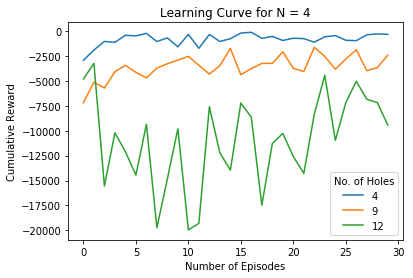

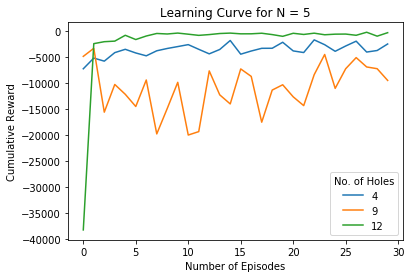

In [14]:
fin_rewards = np.array(fin_rewards)
# print(fin_rewards)
for i in range(2):
    for j in range(i, i+3):
        plt.plot(fin_rewards[j])
    plt.title('Learning Curve for N = ' + str(Ns[i]))
    plt.legend(Ms, title = 'No. of Holes')
    plt.ylabel('Cumulative Reward')
    plt.xlabel('Number of Episodes')
    plt.show()
    

In my understanding, a better learning curve (i.e.better learning performance) will remain above others.
Intuitively, since an agent would try to maximize its time over the frozen points only, increasing the number of holes would lead to poorer performance. For N = 4, it is clear that a similar to intuition trend is observed. It is interesting to note, that he learning curve becomes almost random (highly exploration dependent) when most of the lake is surrounded by holes. 
For N = 5, the trend is not well observable. This is possibly because for larger size and less holes, the number of ways to the end where a hole is encountered become very less. Hence most of the routes become equivalent. This makes sense because as the number of holes increases to 12, a more normal-looking learning curve is visbible.
Hence, I expect learning performace to decrease with increasing holes. It would have more better visible had the plots been made on a better range of values.

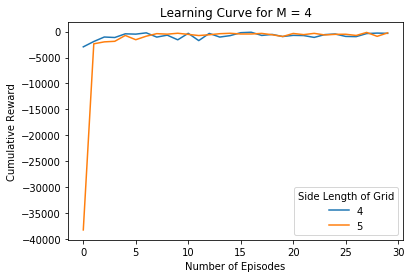

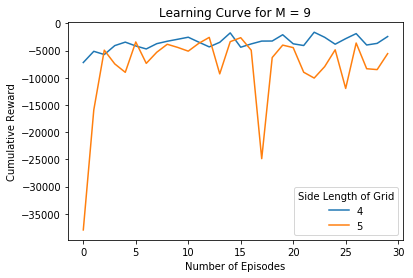

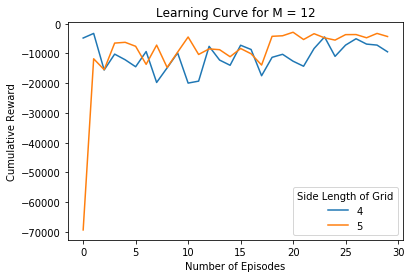

In [19]:
for i in range(3):
    for j in range(i, 6, 3):
        plt.plot(fin_rewards[j])
    plt.title('Learning Curve for M = ' + str(Ms[i]))
    plt.legend(Ns, title = 'Side Length of Grid')
    plt.ylabel('Cumulative Reward')
    plt.xlabel('Number of Episodes')
    plt.show()

For fixed number of holes, if the size increases the performace worsens. Here, two factors act against each other. Larger grids would naturally take more time to be solved, but they also provide more hole-free routes towards the goal. From the plots, the middle one clearly shows that a larger grid leads to worse performace, but this is not the same for the other two. No real conclusions can be made from the first one. In the last plot, the plot with higher number of grids consistently stays the above. This demonstrates both the factors taking over each other, one in each plot.
A general trend can be obtained only if better plots are used.